In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')


#THe dataset is an online retail transactional data

df = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [50]:
df.shape

(1067371, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [52]:
#Now we will apply some data cleaning
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [53]:
df.Description.unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'mixed up',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [54]:
df.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [55]:
df.Description = df.Description.fillna('WHITE HANGING HEART T-LIGHT HOLDER')
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [56]:
df['Customer ID'].mean()

15324.63850435002

In [57]:
df['Customer ID'] = df['Customer ID'].fillna(15324.63850435002)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1067371 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  1067371 non-null  float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [59]:
#Creating a new column named monetary
df['Amount'] = df.Quantity*df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [60]:
df_monetary = df.groupby('Customer ID')['Amount'].sum()
df_monetary = df_monetary.reset_index()
df_monetary.head()

,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


In [61]:
#NOW create another attribute Frequency
df_freq = df.groupby('Customer ID')['Invoice'].count()
df_freq = df_freq.reset_index()
df_freq.columns = ['Customer ID','Frequency']
df_freq.head()

,Customer ID,Frequency
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [62]:
df_freq.columns

Index(['Customer ID', 'Frequency'], dtype='object')

In [63]:
#NOW we will merge these 2 dfs
df1 = pd.merge(df_monetary, df_freq, on='Customer ID', how='inner')
df1.head()

,Customer ID,Amount,Frequency
0,12346.0,-64.68,48
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4404.54,180
4,12350.0,334.40,17


In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [65]:
#Now we create another new attribute Recency
#1st convert the datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate,format='%Y-%m-%d %H:%M:%S')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1067371 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  1067371 non-null  float64       
 7   Country      1067371 non-null  object        
 8   Amount       1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


In [66]:
#Now compute the max date to know the last transactiond date
max_date = max(df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [67]:
#Now compute the difference btw max date and transaction date
df['Diff'] = max_date - df.InvoiceDate
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Diff
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738 days 05:05:00


In [68]:
#Now compute the recency of the customer
df_rec = df.groupby('Customer ID')['Diff'].min()
df_rec = df_rec.reset_index()
df_rec.head()

,Customer ID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [69]:
#Extracting the number of days only
df_rec['Diff'] = df_rec['Diff'].dt.days
df_rec.head()

,Customer ID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [70]:
#Now merging the dfs to get the final RFM df
df1 = pd.merge(df1,df_rec, on='Customer ID', how='inner')
df1.columns = ['Customer ID','Amount','Freqeuncy','Recency']
df1.head()

,Customer ID,Amount,Freqeuncy,Recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309


## Now we will perform some Outlier Anlaysis of amount frequency and recency


Text(0.5, 0, 'Attributes')

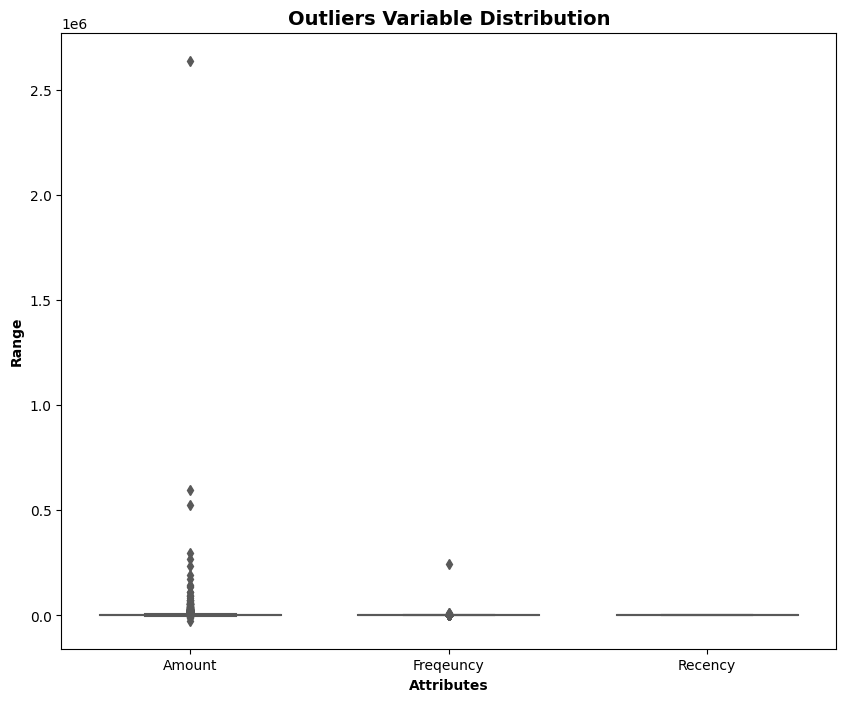

In [71]:
attributes = ['Amount','Freqeuncy','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df1[attributes], orient='v',palette='Set2',whis=1.5, saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Range',fontweight='bold')
plt.xlabel('Attributes',fontweight='bold')


## Now we will Remove the outliers

In [72]:
#Removing (Statistical)  outliers for amount
Q1 = df1.Amount.quantile(0.05)
Q3 = df1.Amount.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df.Amount >= Q1 - 1.5*IQR) & (df1.Amount <= Q3 + 1.5*IQR)]

#REMOVING (STATISTICAL) outliers for Recency
Q1 = df1.Recency.quantile(0.05)
Q3 = df1.Recency.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.Recency >= Q1 - 1.5*IQR) & (df1.Recency <= Q3 + 1.5*IQR)]

#Removing (statistical) outliers for Frequency
Q1 = df1.Freqeuncy.quantile(0.05)
Q3 = df1.Freqeuncy.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.Freqeuncy >= Q1 - 1.5*IQR) & (df1.Freqeuncy <= Q3 + 1.5*IQR)]



## #now AGAIN RUN THE ABOVE OUTLIERS DETECTION CODE TO CHECK HOW THE OUTLIERS ARE HANDELED

Text(0.5, 0, 'Attributes')

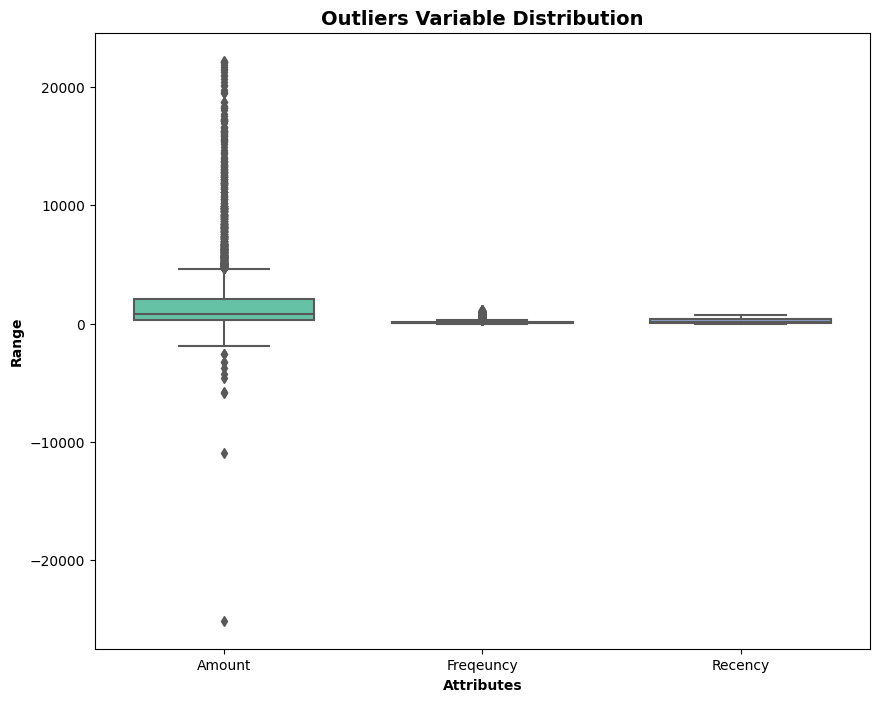

In [73]:
attributes = ['Amount','Freqeuncy','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df1[attributes], orient='v',palette='Set2',whis=1.5, saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Range',fontweight='bold')
plt.xlabel('Attributes',fontweight='bold')

## NOW scaling the features

In [74]:
df2 = df1[['Amount','Freqeuncy','Recency']]

#Instantiate
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df2_scaled = ss.fit_transform(df2)
df2_scaled.shape


(5832, 3)

In [75]:
df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = ['Amount','Freqeuncy','Recency']
df2_scaled.head()

,Amount,Freqeuncy,Recency
0,-0.661863,-0.407184,0.564665
1,1.338285,0.887699,-0.962348
2,0.069704,-0.388234,-0.618299
3,0.906951,0.426595,-0.882227
4,-0.521775,-0.602995,0.489257


## Now we Build the Model

In [76]:
kmeans = KMeans(n_clusters=4, max_iter = 50)
kmeans.fit(df2_scaled)

KMeans(max_iter=50, n_clusters=4)

In [77]:
kmeans.labels_

array([2, 0, 1, ..., 2, 2, 0], dtype=int32)

In [78]:
set(kmeans.labels_)

{0, 1, 2, 3}

## Now we make an Elbow Curve to get the right number of Clusters

In [ ]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)
    
    ssd.append(kmeans.intertia_)
    
    
#now plot the ssds for each n_clusters
plt.plot(ssd)
plt.show()

In [81]:
#Now final model with k=3
kmeans = KMeans(n_clusters=3, max_iter = 300)
kmeans.fit(df2_scaled)


KMeans(n_clusters=3)

In [86]:
import pickle
#Now save the model
filename = 'kmeans_model.pkl'

#Open the file in write mode
with open('kmeans_saved_model','wb') as file:
    pickle.dump(kmeans, file)
    
#close the file
file.close()

pickle.dump(kmeans, open('kmeans_model.pkl','wb'))

In [89]:
#Now final model with k=3
kmeans = KMeans(n_clusters=3, max_iter = 300)
kmeans.fit(df2_scaled)

kmeans.predict(df2_scaled)

array([0, 2, 1, ..., 0, 0, 1], dtype=int32)

In [90]:
#NOW assign the labels
df1['Cluster_ID'] = kmeans.predict(df2_scaled)
df1.head()

,Customer ID,Amount,Freqeuncy,Recency,Cluster_ID
0,12346.0,-64.68,48,325,0
1,12347.0,5633.32,253,1,2
2,12348.0,2019.40,51,74,1
3,12349.0,4404.54,180,18,1
4,12350.0,334.40,17,309,0


<Axes: xlabel='Cluster_ID', ylabel='Amount'>

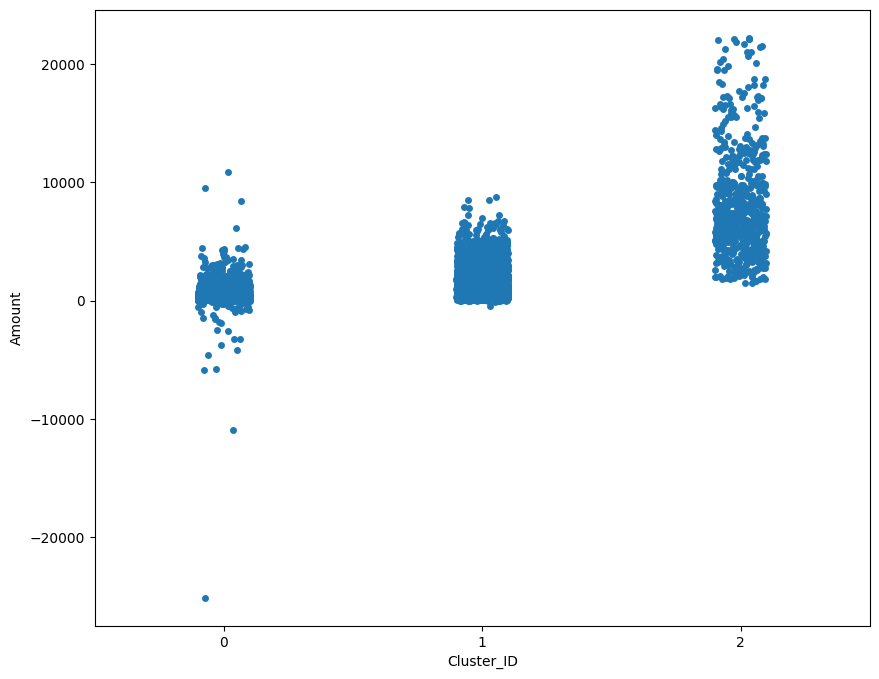

In [91]:
#Visualize the cluster id vs amount
sns.stripplot(x='Cluster_ID',y='Amount',data=df1)